In [22]:
import sys
import json
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# Add project root to path
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))

from protocol.scoring.post_scorer import PostScorer

In [23]:
# Load query results from JSON file
data_path = Path('../data/posts.json')
with open(data_path, 'r') as f:
    query_results = json.load(f)

print(f"Loaded {len(query_results)} query results")

# Count unique UIDs and X user IDs
unique_uids = len(set(result['uid'] for result in query_results))
unique_x_user_ids = len(set(result['user_id'] for result in query_results))
print(f"Number of unique UIDs: {unique_uids}")
print(f"Number of unique X user ids: {unique_x_user_ids}")

# Count unique X posts
unique_tweet_ids = set()
for result in query_results:
    for tweet in result['tweets']:
        tweet_id = tweet['Tweet'].get('ID')
        if tweet_id:
            unique_tweet_ids.add(tweet_id)

print(f"Number of unique X posts: {len(unique_tweet_ids)}")

# Print detailed stats
total_queries = len(query_results)
total_tweets = sum(len(result['tweets']) for result in query_results)
unique_tweets = len(unique_tweet_ids)

print(f"\nDetailed Statistics:")
print(f"Total query results: {total_queries}")
print(f"Total X posts: {total_tweets}")
print(f"Unique X posts: {unique_tweets}")

# Check for queries with no tweets
empty_queries = sum(1 for result in query_results if len(result['tweets']) == 0)
print(f"Queries with no tweets: {empty_queries}")

Loaded 2096 query results
Number of unique UIDs: 205
Number of unique X user ids: 221
Number of unique X posts: 5071

Detailed Statistics:
Total query results: 2096
Total X posts: 5071
Unique X posts: 5071
Queries with no tweets: 0


In [24]:
# Create dictionaries to store tweets per user and user relationships
user_tweet_counts = {}
user_tweets = {}
uid_user_ids = {}  # Track multiple user_ids per uid

for result in query_results:
    user_id = result['user_id']
    uid = result['uid']
    subnet_id = result['subnet_id']
    
    # Track uid to user_id relationships
    if uid not in uid_user_ids:
        uid_user_ids[uid] = set()
    uid_user_ids[uid].add(user_id)
    
    if user_id not in user_tweets:
        user_tweets[user_id] = set()
    
    for tweet in result['tweets']:
        tweet_id = tweet['Tweet'].get('ID')
        if tweet_id:
            user_tweets[user_id].add(tweet_id)
            user_tweet_counts[user_id] = {
                'uid': uid,
                'subnet_id': subnet_id,
                'tweet_count': len(user_tweets[user_id])
            }

# Convert to DataFrame
df_users = pd.DataFrame([
    {'user_id': user_id, **stats}
    for user_id, stats in user_tweet_counts.items()
])
df_users = df_users.sort_values('tweet_count', ascending=False)

# Save to CSV
output_dir = '../data/csv'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'user_tweet_counts.csv')
df_users.to_csv(output_path, index=False)

# Print statistics about the uid to user_id relationships
print("\nUID to User ID relationships:")
for uid, user_ids in uid_user_ids.items():
    if len(user_ids) > 1:
        print(f"UID {uid} has {len(user_ids)} different user_ids: {user_ids}")
print(f"Total unique UIDs: {len(uid_user_ids)}")
print(f"Total unique X user ids: {len(user_tweet_counts)}")
print(f"Total unique tweets across all users: {sum(len(tweets) for tweets in user_tweets.values())}")
print(f"\nData saved to: {output_path}")
display(df_users)


UID to User ID relationships:
UID 27 has 2 different user_ids: {'2220312806', '1297280634'}
UID 28 has 2 different user_ids: {'1872660653854674944', '1527734372966838273'}
UID 19 has 2 different user_ids: {'1871956303834185728', '4477606516'}
UID 89 has 2 different user_ids: {'384408291', '84118206'}
UID 104 has 2 different user_ids: {'1362854823742308353', '1873518506928742400'}
UID 15 has 2 different user_ids: {'249284811', '1872693895995461632'}
UID 113 has 2 different user_ids: {'1873357651809370112', '420051579'}
UID 94 has 2 different user_ids: {'381286549', '1591610840330878976'}
UID 25 has 3 different user_ids: {'3313768127', '56842370', '1267270952'}
UID 26 has 2 different user_ids: {'4477606516', '152453890'}
UID 34 has 2 different user_ids: {'628114213', '1872629811988115456'}
UID 43 has 2 different user_ids: {'196328278', '1873002213263745024'}
UID 44 has 2 different user_ids: {'1873002781336059905', '1061325248'}
UID 5 has 2 different user_ids: {'1824175399527649284', '15

,user_id,uid,subnet_id,tweet_count
12,20510925,23,59,450
86,1770087158440976384,170,59,395
125,1859934851828195328,138,59,169
13,1675866018235965441,117,59,116
80,1152727572,158,59,107
...,...,...,...,...
135,1526011983455105026,12,59,1
201,1873136862723772416,67,59,1
130,1574768678507511808,175,59,1
191,1527568310724104192,56,59,1



Scoring Summary:
Total unique UIDs: 205
Total X posts scored: 5071
Date range: 2024-12-16 to 2024-12-31

UID Daily Average Scores:


timestamp,2024-12-16,2024-12-17,2024-12-18,2024-12-19,2024-12-20,2024-12-21,2024-12-22,2024-12-23,2024-12-24,2024-12-26,2024-12-27,2024-12-28,2024-12-29,2024-12-30,2024-12-31
uid,,,,,,,,,,,,,,,
151,NaN,NaN,NaN,NaN,NaN,0.222,0.272,0.224,0.317,NaN,0.437,NaN,NaN,0.446,0.450
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418,0.419,0.420
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552,0.595,0.419,0.418
104,0.191,0.163,0.313,0.318,0.329,NaN,0.282,0.246,0.208,0.343,0.338,0.333,NaN,0.436,0.401
28,0.244,NaN,0.241,NaN,0.226,0.234,NaN,0.233,0.259,NaN,0.278,0.270,0.402,0.344,0.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.449,0.426,0.441,NaN,NaN,NaN
96,NaN,0.183,0.205,0.231,NaN,0.213,0.395,0.321,NaN,0.436,NaN,NaN,NaN,NaN,NaN
97,NaN,0.205,0.207,0.221,0.400,0.235,0.435,NaN,0.378,0.347,0.443,0.446,NaN,NaN,NaN


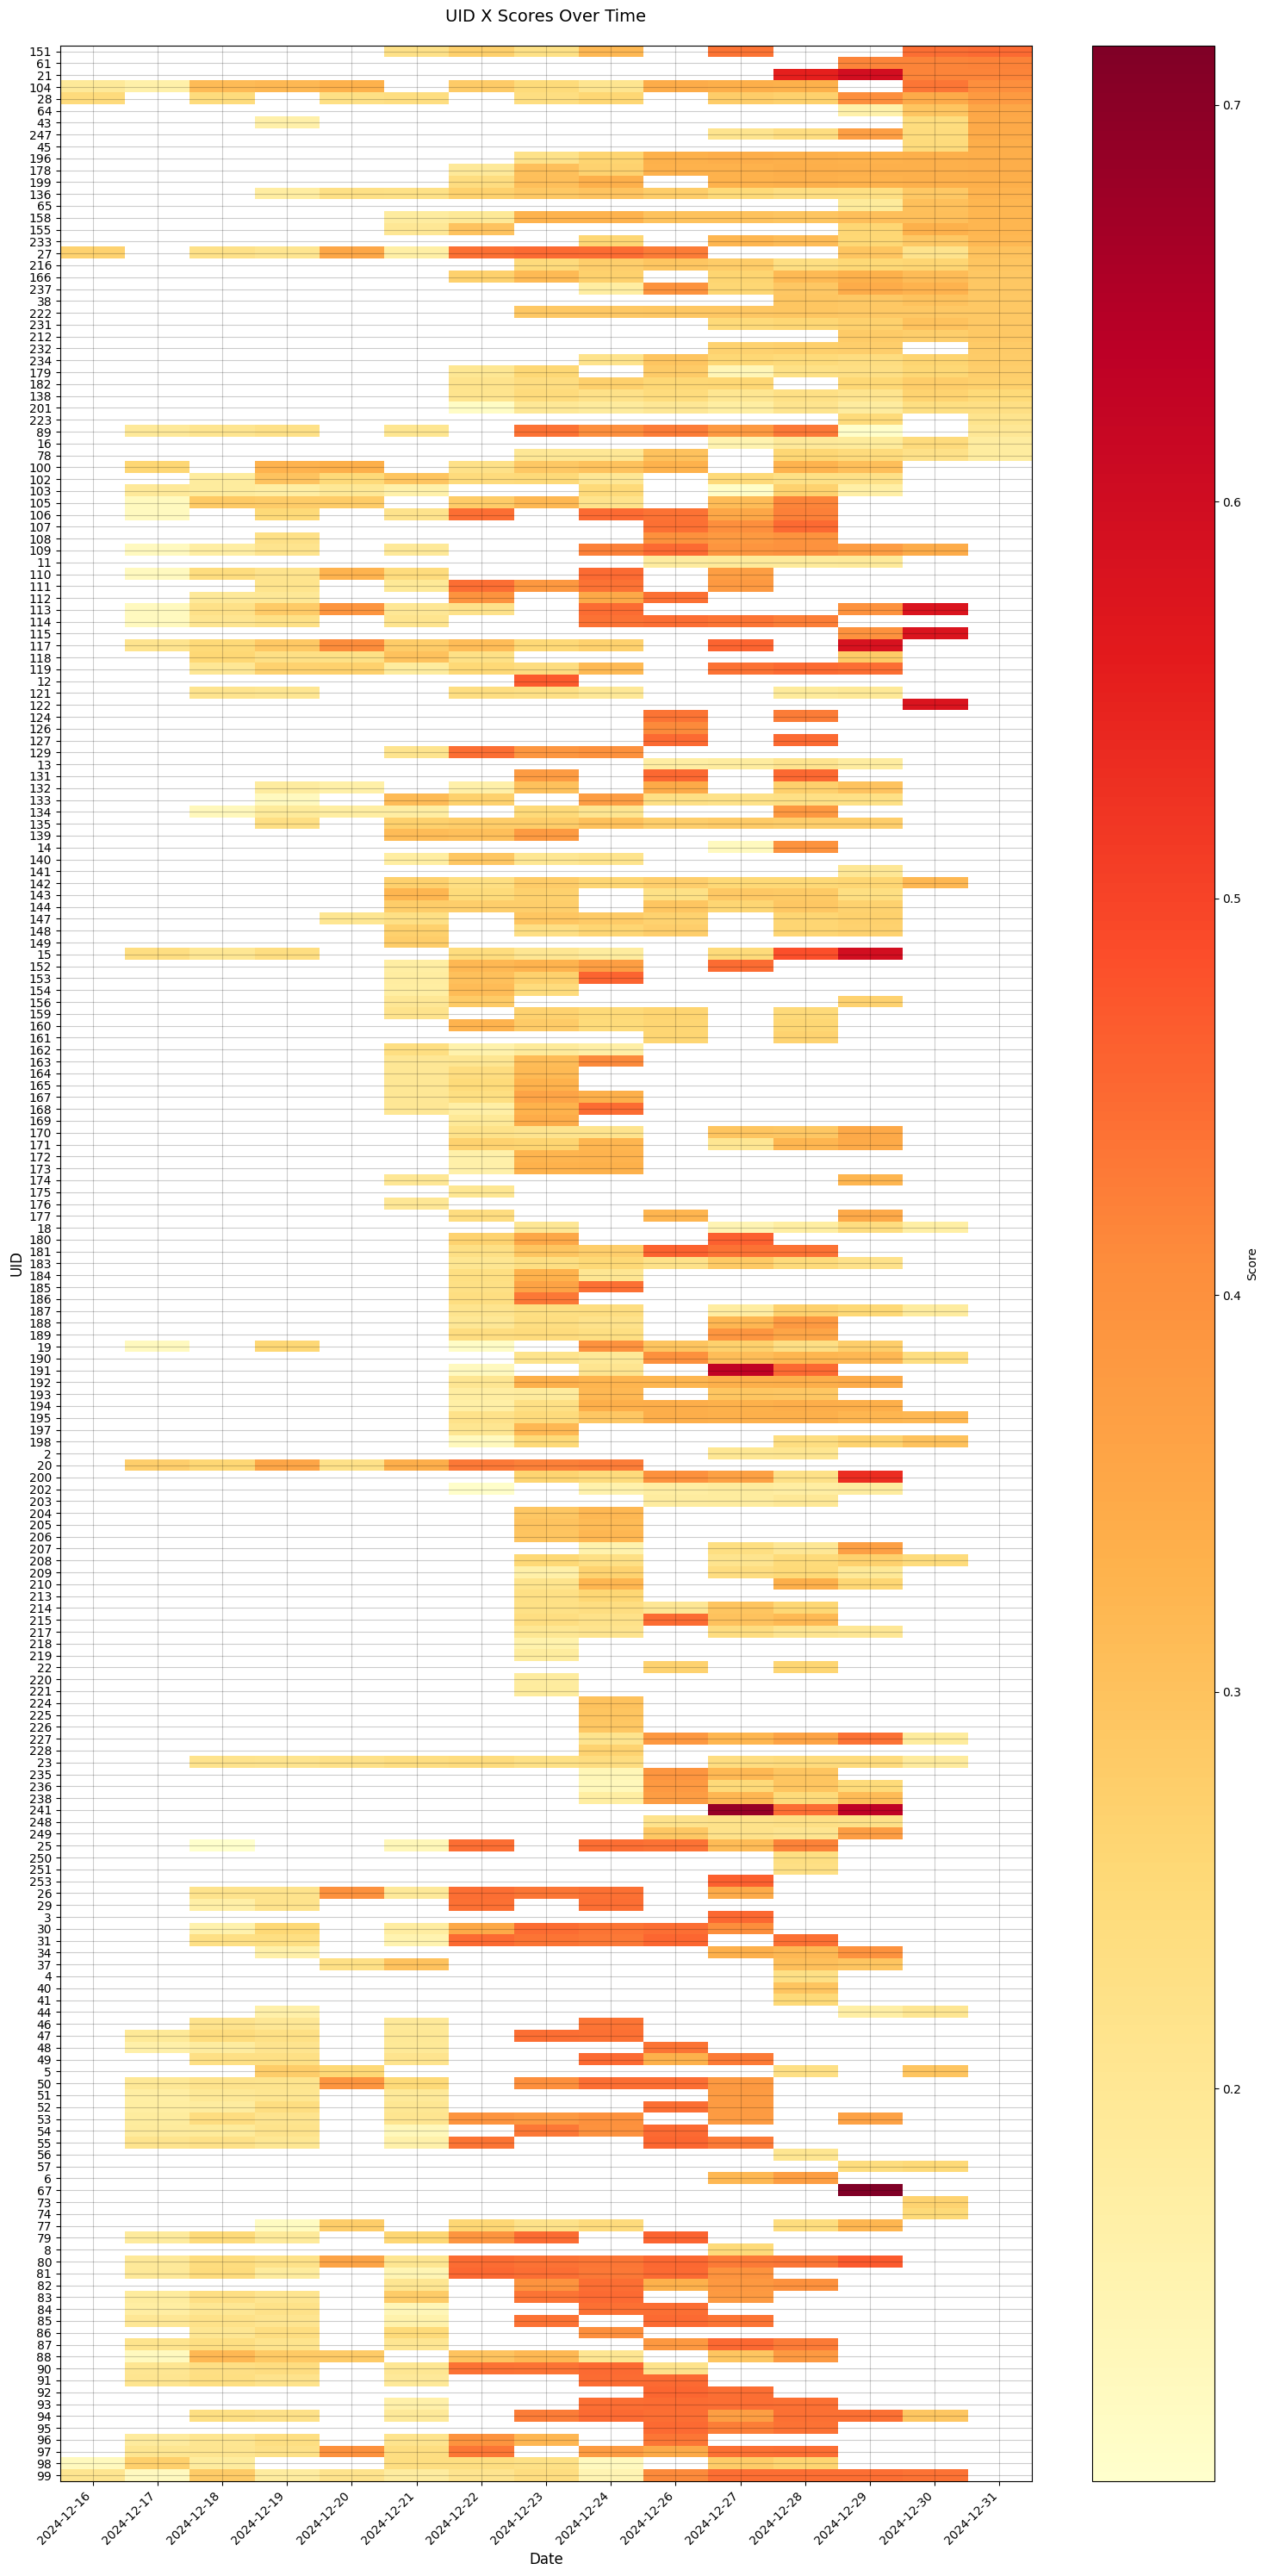

In [25]:
# Process and score tweets
uid_user_scores = defaultdict(lambda: defaultdict(list))
scorer = PostScorer()
scoring_records = []

# Score tweets and create records
for result in query_results:
    uid = result['uid']
    user_id = result['user_id']
    subnet_id = result['subnet_id']
    
    scored_posts = scorer.score_posts([{
        'uid': uid,
        'tweets': result['tweets']
    }])[0]
    
    for score_data in scored_posts['scores']:
        if not score_data['timestamp']:
            continue
            
        record = {
            'uid': uid,
            'user_id': user_id,
            'subnet_id': subnet_id,
            'tweet_id': score_data['tweet_id'],
            'score': score_data['score'],
            'timestamp': datetime.fromtimestamp(score_data['timestamp'])
        }
        scoring_records.append(record)
        uid_user_scores[uid][user_id].append(record)

# Create DataFrame and sort by timestamp
df_scores = pd.DataFrame(scoring_records)
df_scores = df_scores.sort_values(['uid', 'user_id', 'timestamp'])

# Create pivot table and sort by UID numerically
df_pivot = pd.pivot_table(
    df_scores,
    values='score',
    index='uid',
    columns=pd.Grouper(key='timestamp', freq='D'),
    aggfunc='mean'
).round(3)

# Convert index to numeric and sort by last column descending
df_pivot.index = pd.to_numeric(df_pivot.index)
df_pivot = df_pivot.sort_values(df_pivot.columns[-1], ascending=False)

# Print summary statistics
print("\nScoring Summary:")
print(f"Total unique UIDs: {len(uid_user_scores)}")
print(f"Total X posts scored: {len(scoring_records)}")
print(f"Date range: {df_scores['timestamp'].min().date()} to {df_scores['timestamp'].max().date()}")

# Display pivot table
print("\nUID Daily Average Scores:")
display(df_pivot)

# Create visualization
plt.figure(figsize=(15, 30))

# Create heatmap
plt.imshow(df_pivot, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='Score')

plt.title('UID X Scores Over Time', pad=20, fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('UID', fontsize=12)

# Format x-axis (dates)
plt.xticks(range(len(df_pivot.columns)), 
           df_pivot.columns.date, 
           rotation=45, 
           ha='right',
           fontsize=10)

# Format y-axis (UIDs)
y_ticks = range(len(df_pivot.index))
plt.yticks(y_ticks, 
           df_pivot.index, 
           fontsize=10)

plt.grid(True, which='major', color='black', alpha=0.2)
plt.subplots_adjust(left=0.15)
plt.tight_layout()
plt.show()

# Save data
output_dir = '../data/csv'
os.makedirs(output_dir, exist_ok=True)
df_scores.to_csv(os.path.join(output_dir, 'tweet_scores_timeline.csv'), index=False)
df_pivot.to_csv(os.path.join(output_dir, 'uid_daily_scores.csv'))